# Base Ball 
Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features:---- Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output:----- Number of predicted wins (W)

# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

 The dataset is having 30 rows and 17 columns

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We can see that all features are integer(int64) datatype except ERA column and target variable W is also int datatype

In [5]:
#Checking null values
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can observe that there are no null values in dataset

In [6]:
#Describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

 Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# EDA

### Plotting Distribution curve

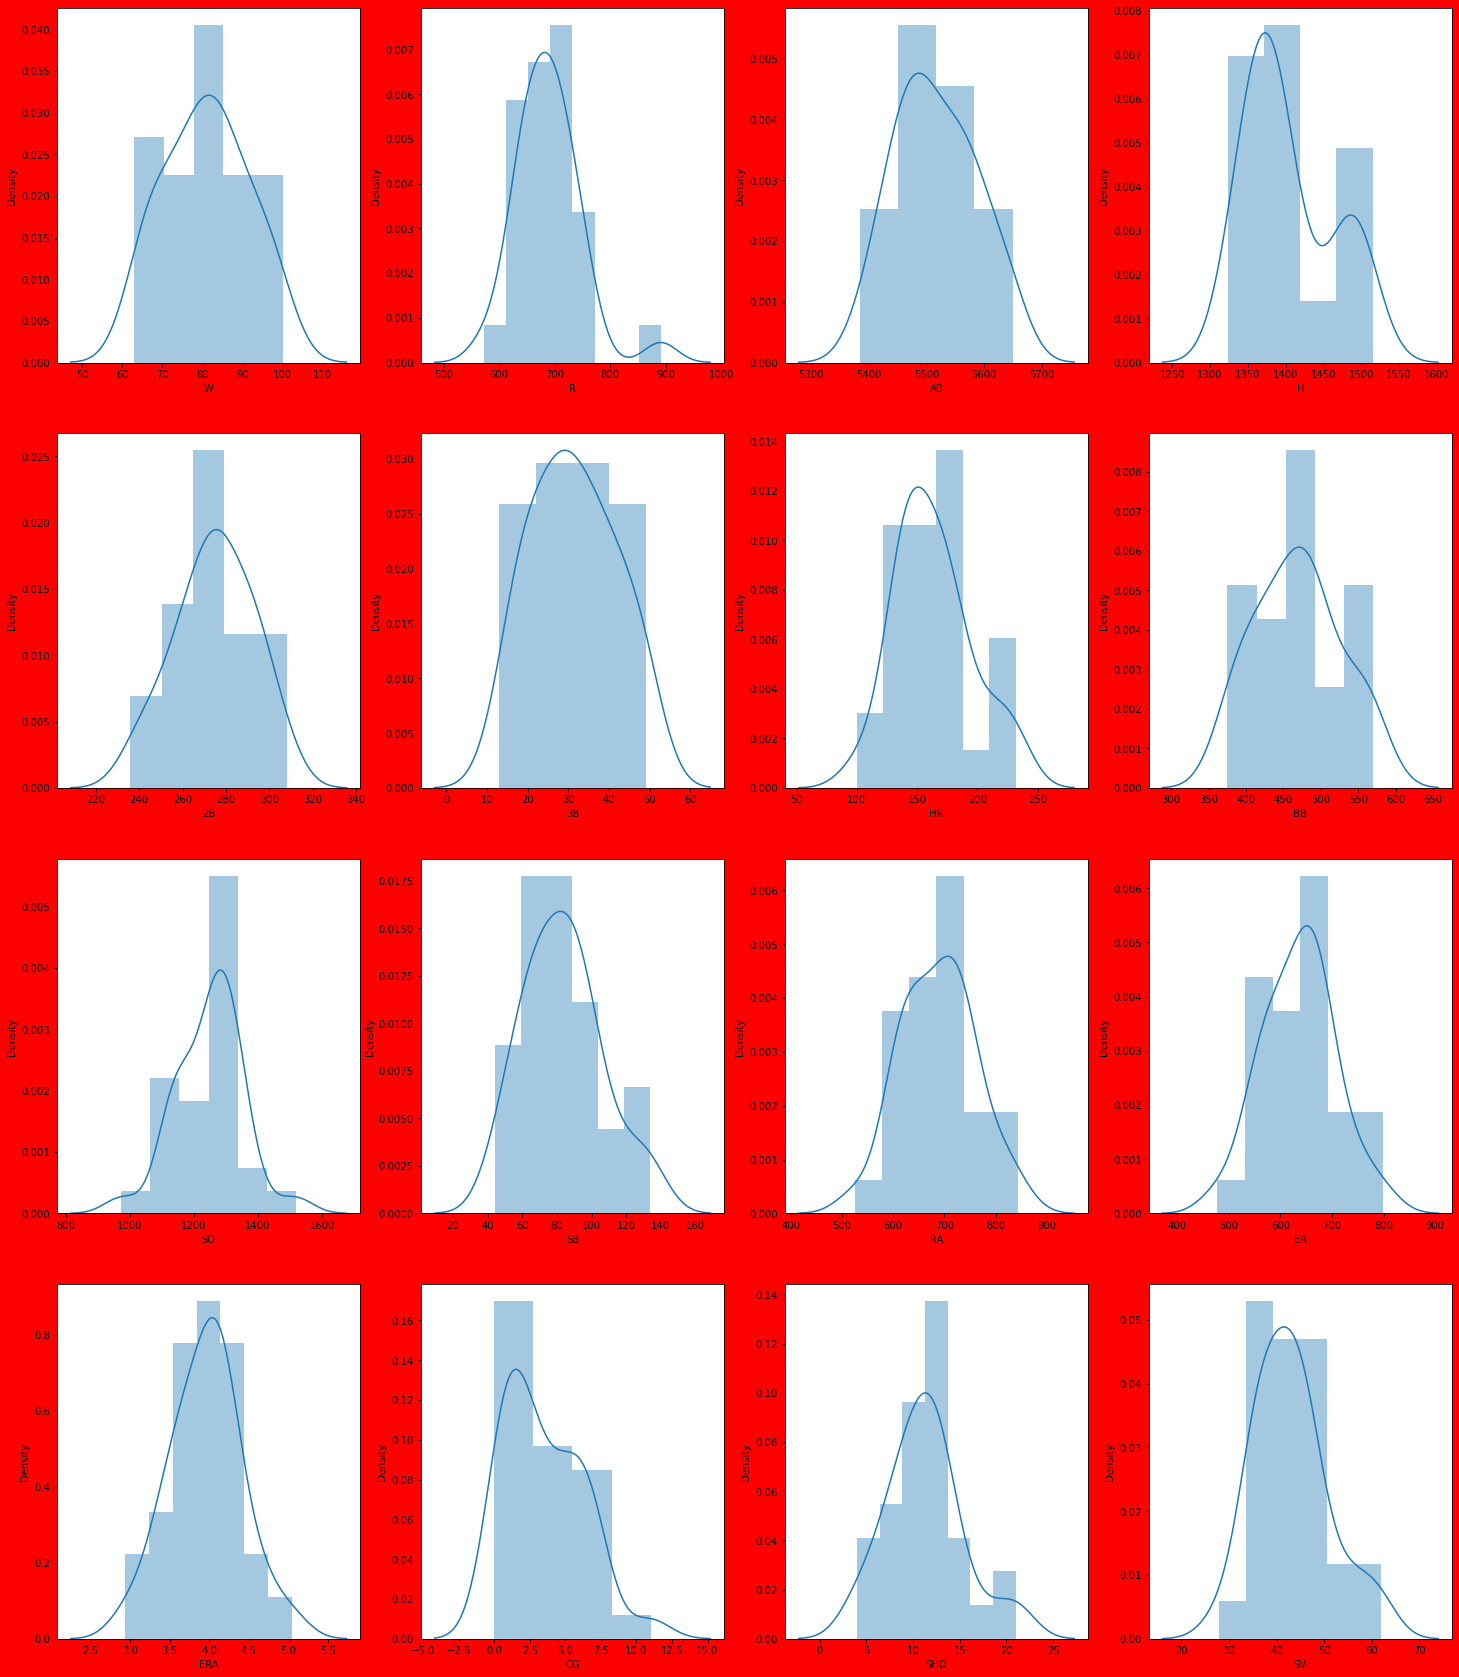

In [9]:
plt.figure(figsize=(25,30),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
    plotnumber=plotnumber+1

plt.show()

In [10]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


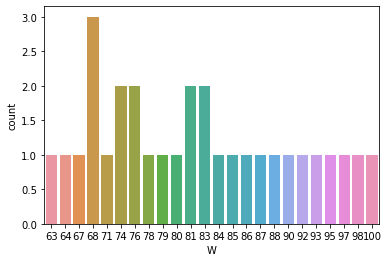

In [11]:
#PLotting countplot for target varibale
ax=sns.countplot(x='W',data=df)
print(df['W'].value_counts())

From above plotting we oberved that maximumn number of wins is 68

### Plotting Histogram

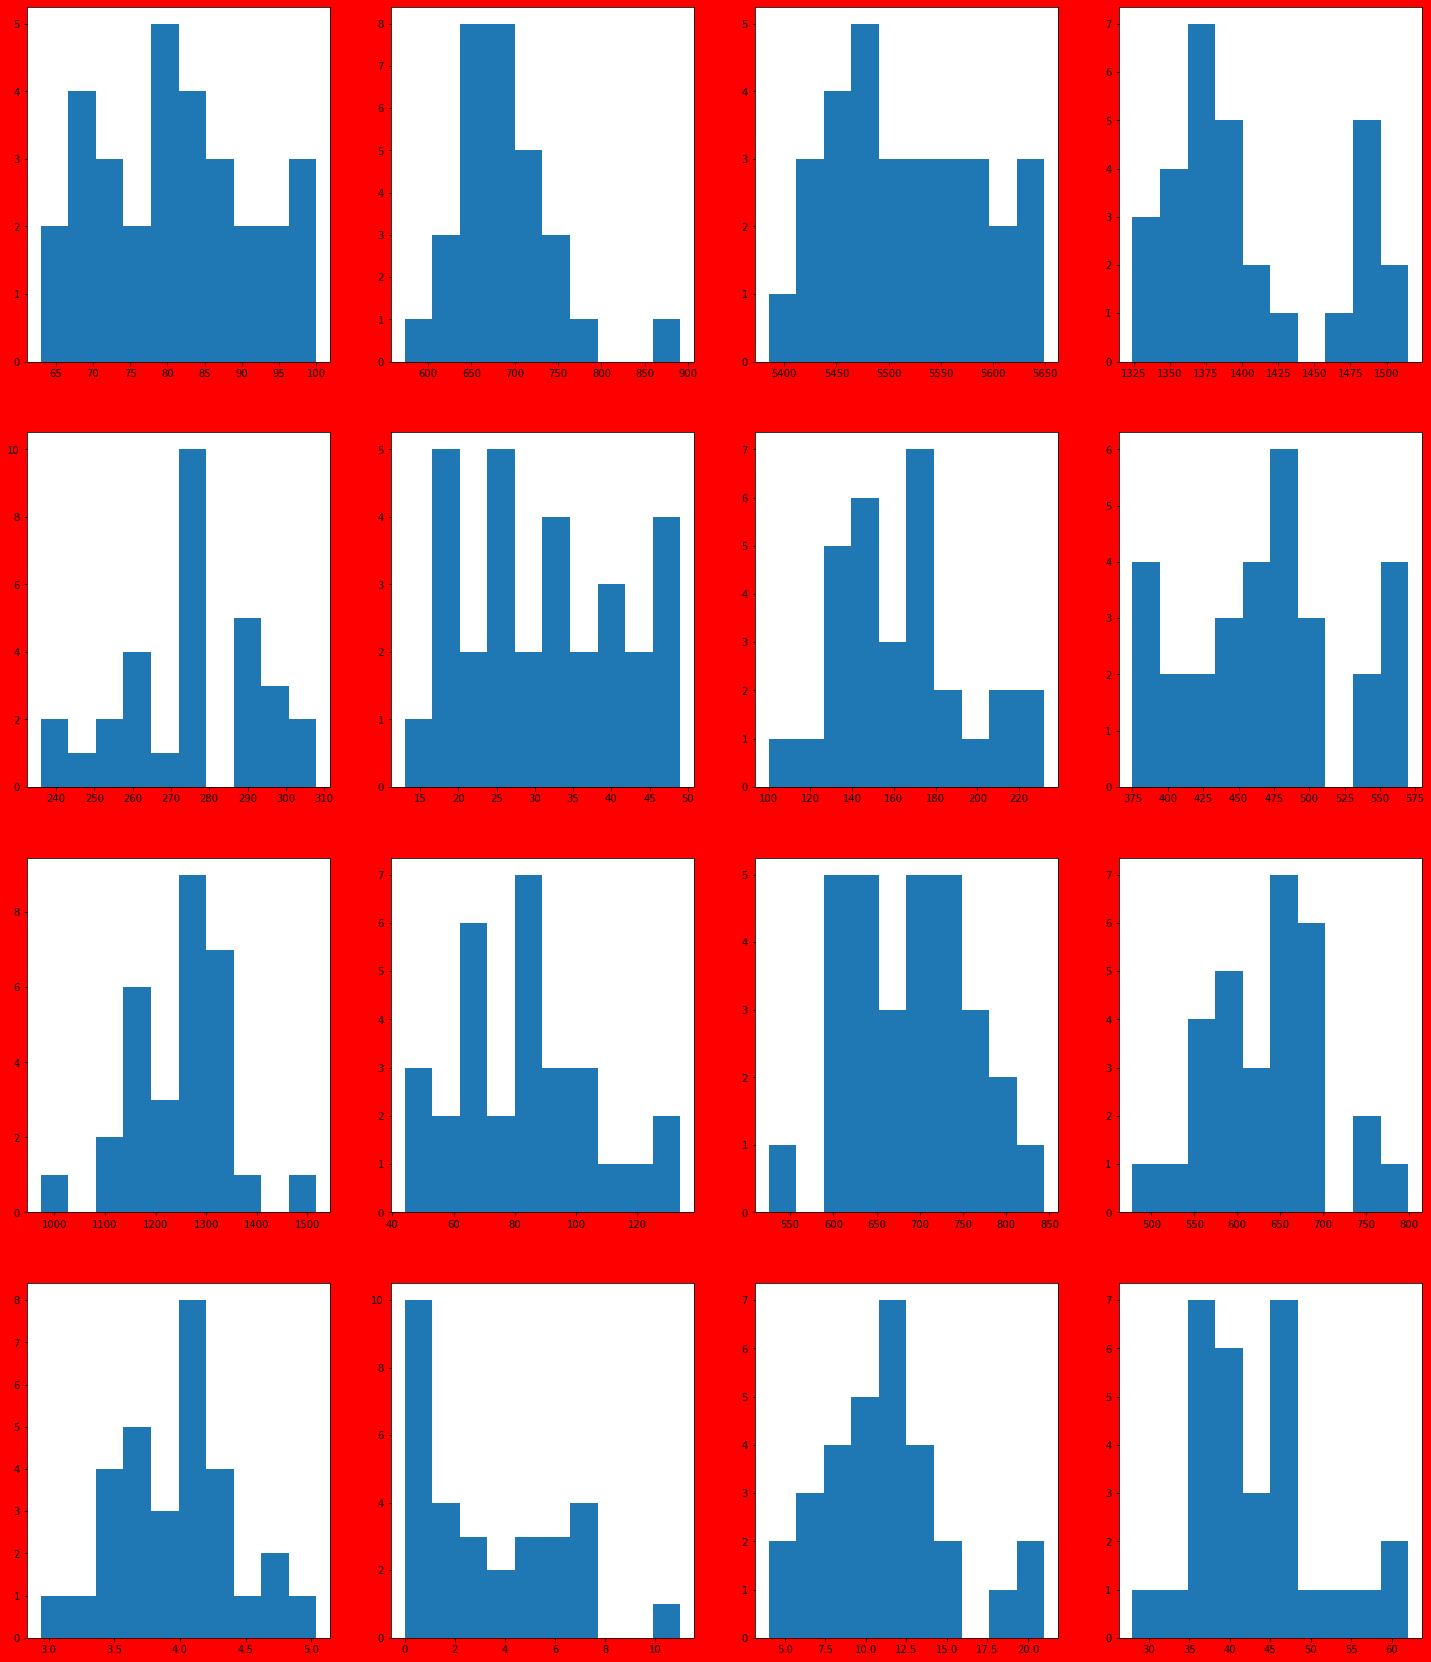

In [12]:
plt.figure(figsize=(25,30),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.hist(df[column])
    plotnumber=plotnumber+1

plt.show()

# Bivariate Analysis

### Plotting Scatterplot(Between target variable and features)

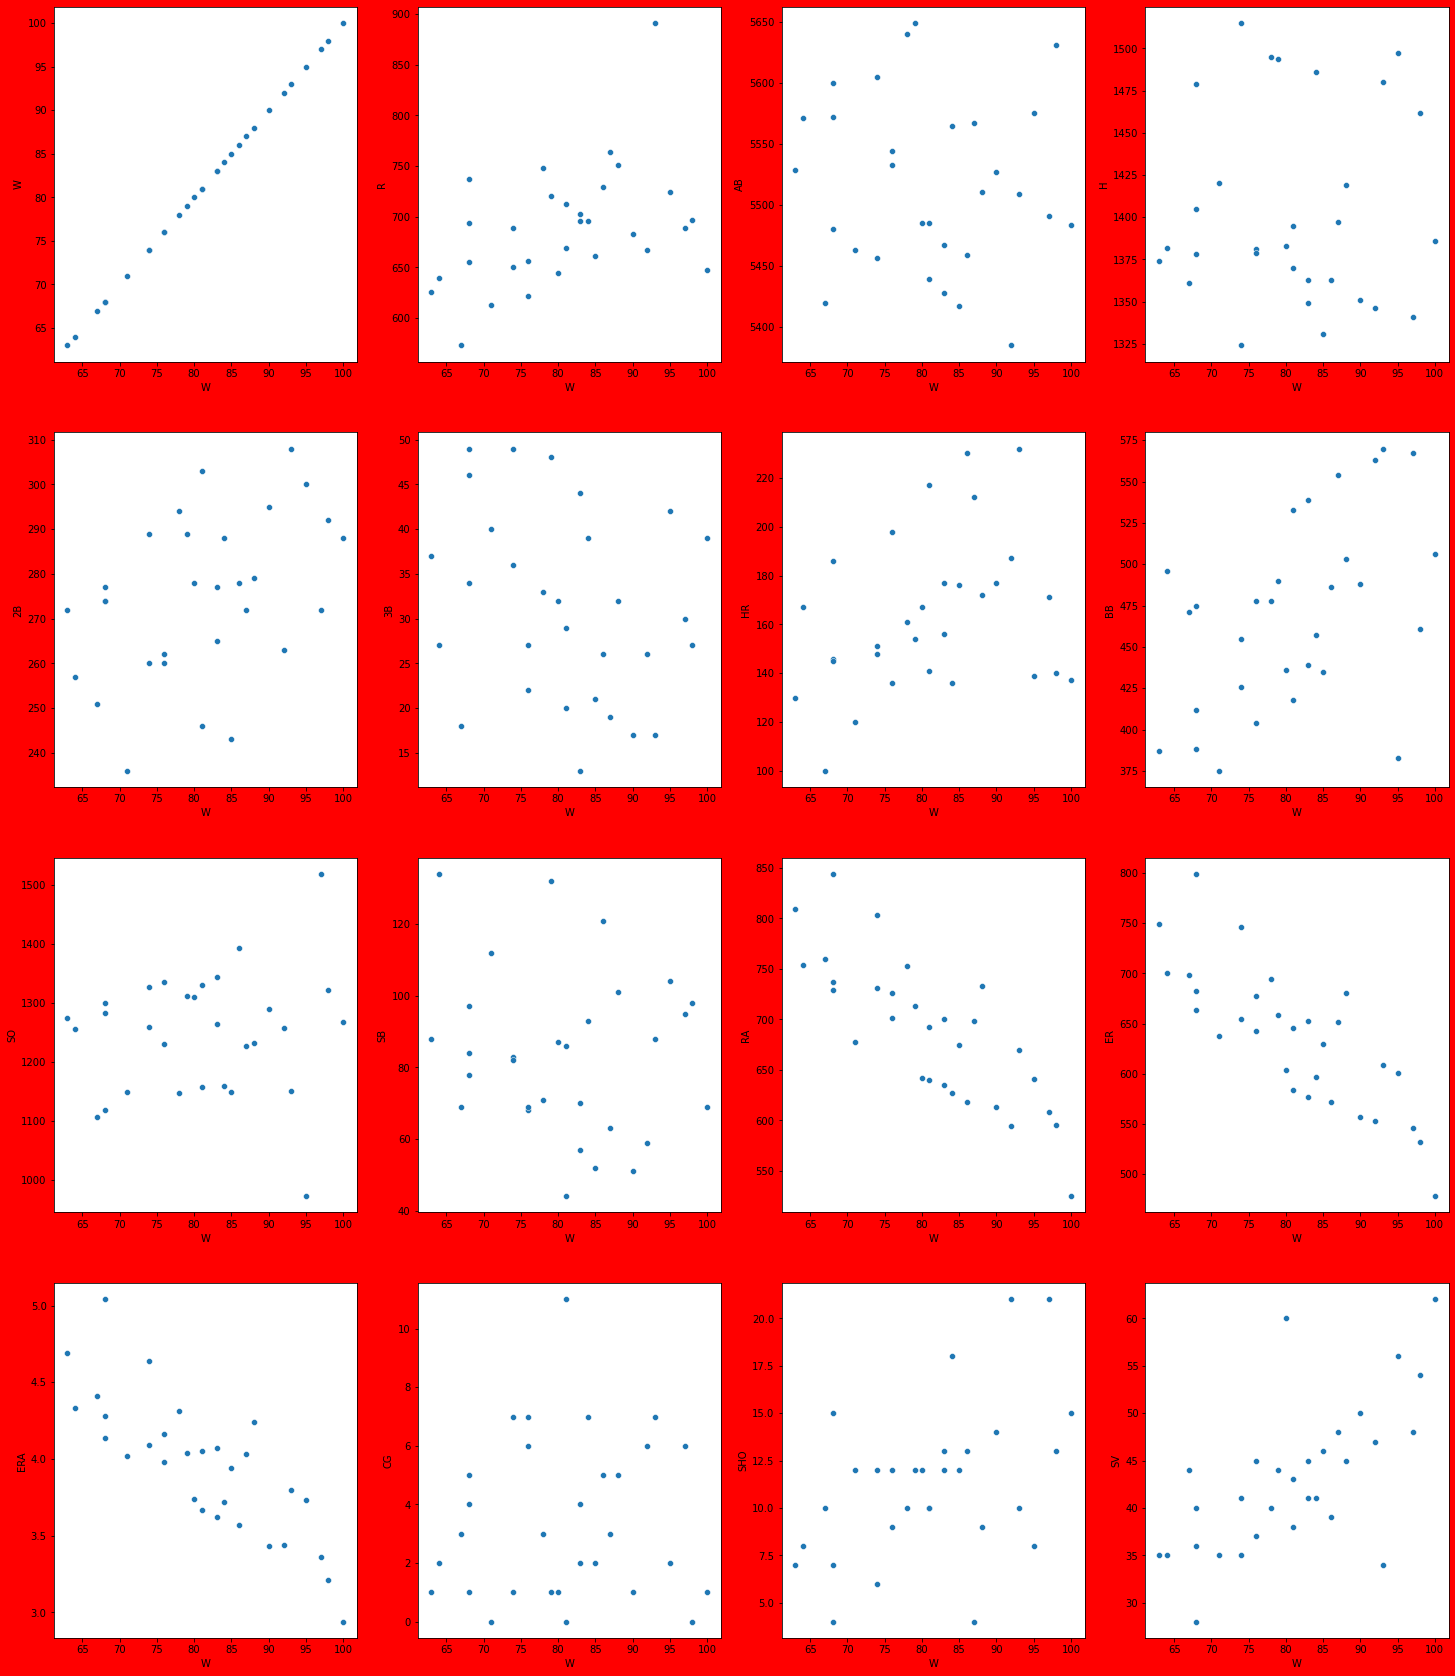

In [13]:
plt.figure(figsize=(25,30),facecolor='red')
plotnumber=1

for column in df[1:]:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(df['W'],df[column])
    plotnumber=plotnumber+1

plt.show()

From above observation we can observe that columns['RA','ER','ERA'] are indirecttly proportional to target variable 'W' and column(SV) is directly proportinal to target vriable 'W'

## Plotting Scatterplot(among features)

<AxesSubplot:xlabel='ER', ylabel='ERA'>

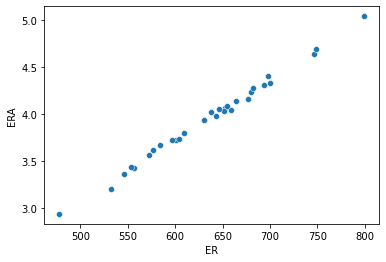

In [14]:
 sns.scatterplot(df['ER'],df['ERA'])

<AxesSubplot:xlabel='SHO', ylabel='SV'>

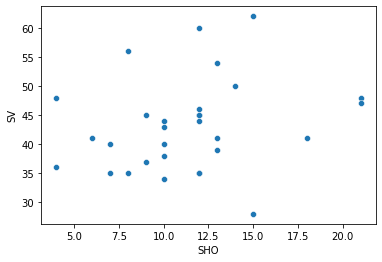

In [15]:
sns.scatterplot(df['SHO'],df['SV'])

<AxesSubplot:xlabel='2B', ylabel='3B'>

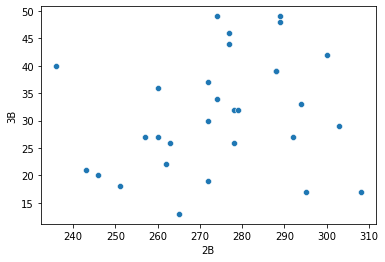

In [16]:
sns.scatterplot(df['2B'],df['3B'])

# Checking for Skewness

In [17]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Setting skewness limits to -0.65 to +0.65
We can observer that only column("R") is higly skewed

# Checking for Corrrelation

### Plotting heatmap

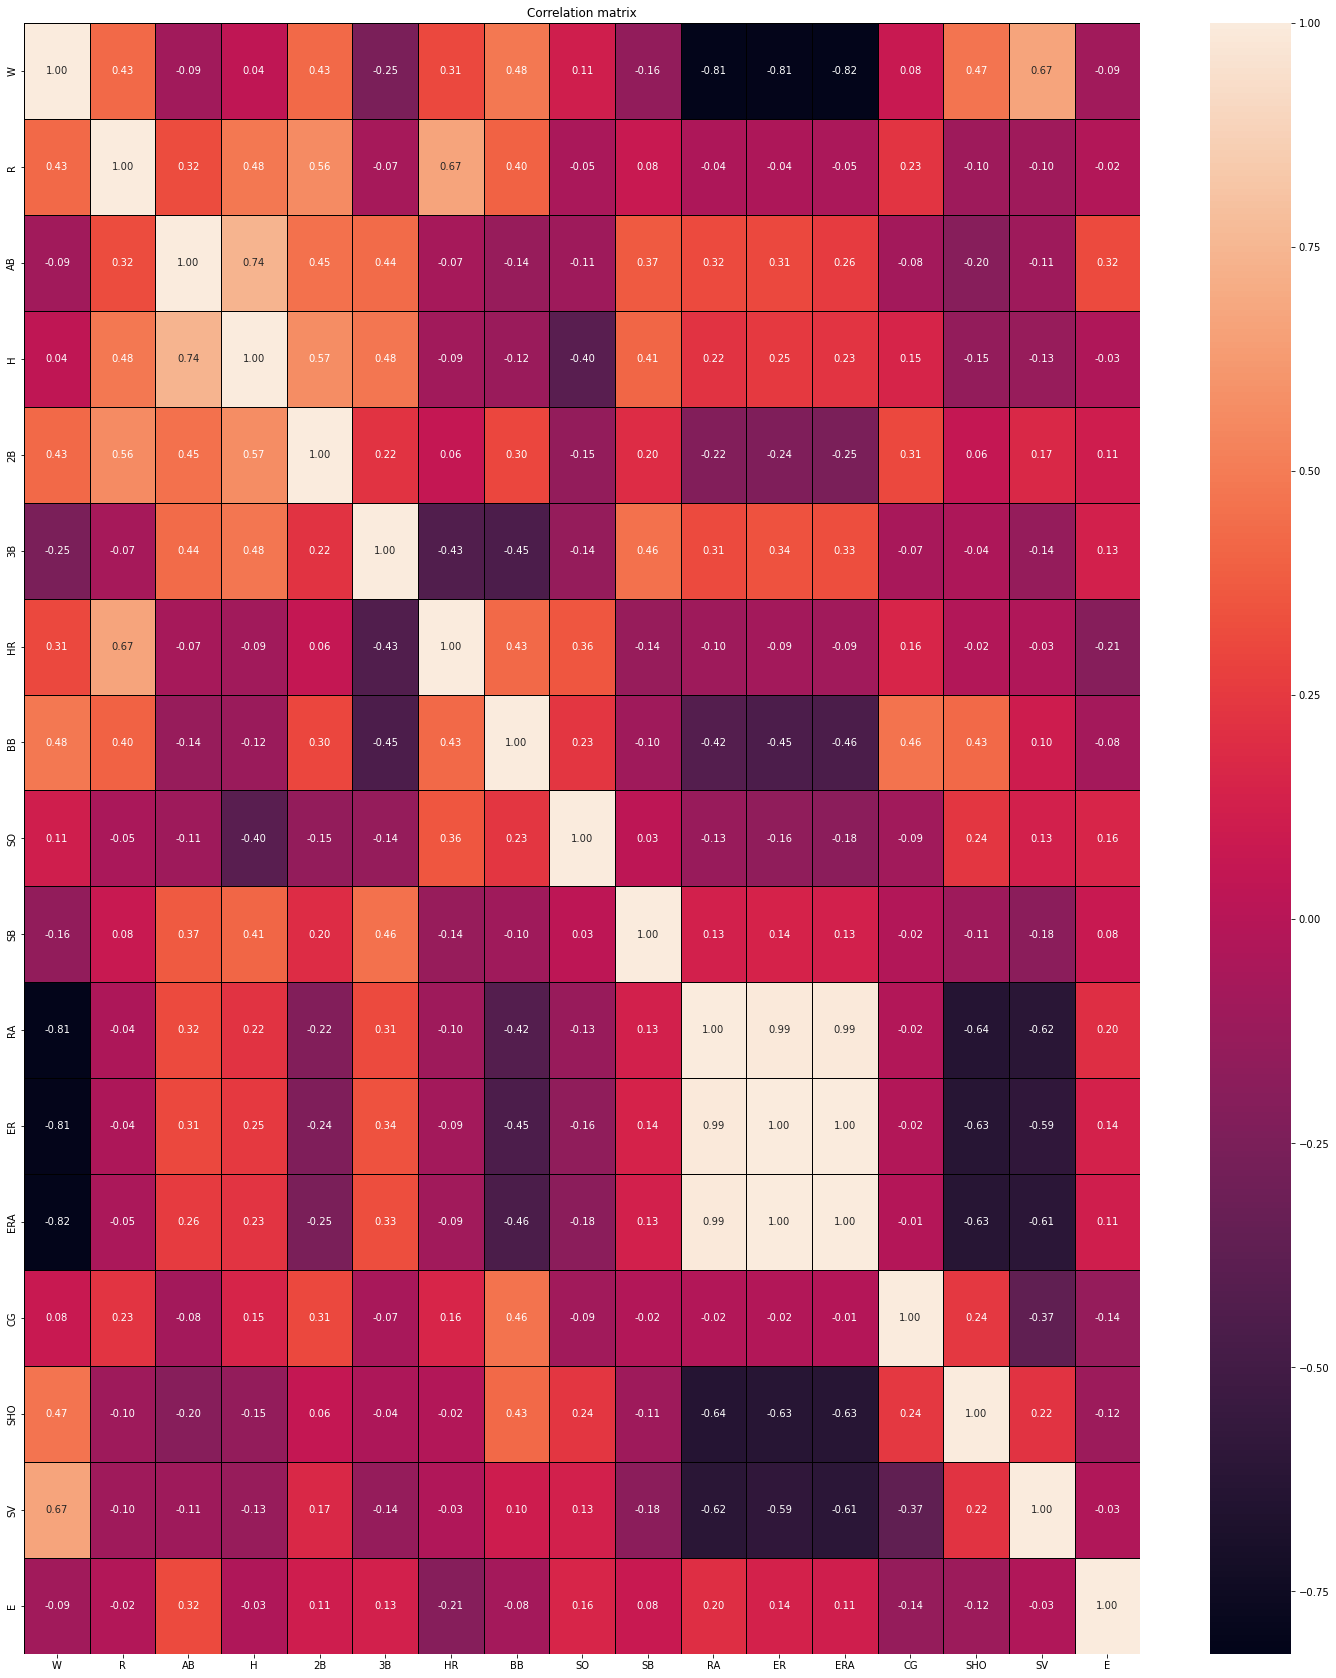

In [18]:
plt.figure(figsize=(25,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

# Checking the columns which are positively and negatively related to target varibale

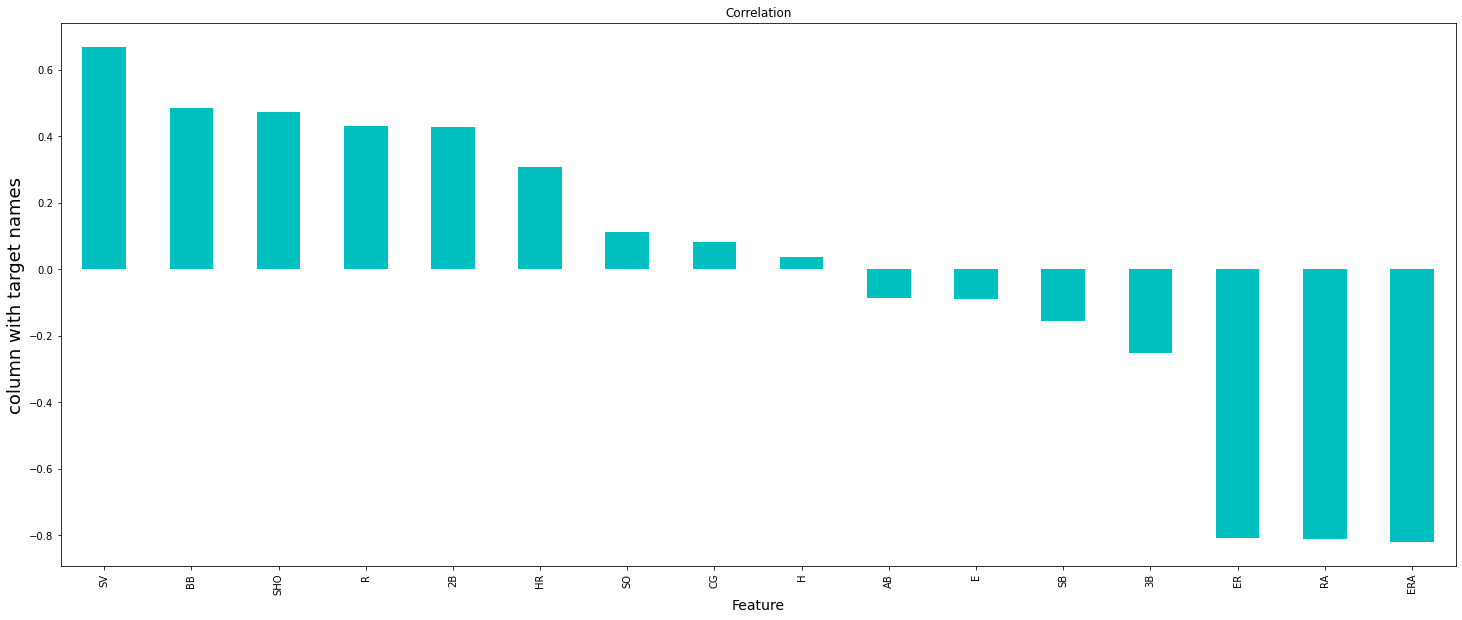

In [19]:
plt.figure(figsize=(25,10))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()



# Checking for outliers

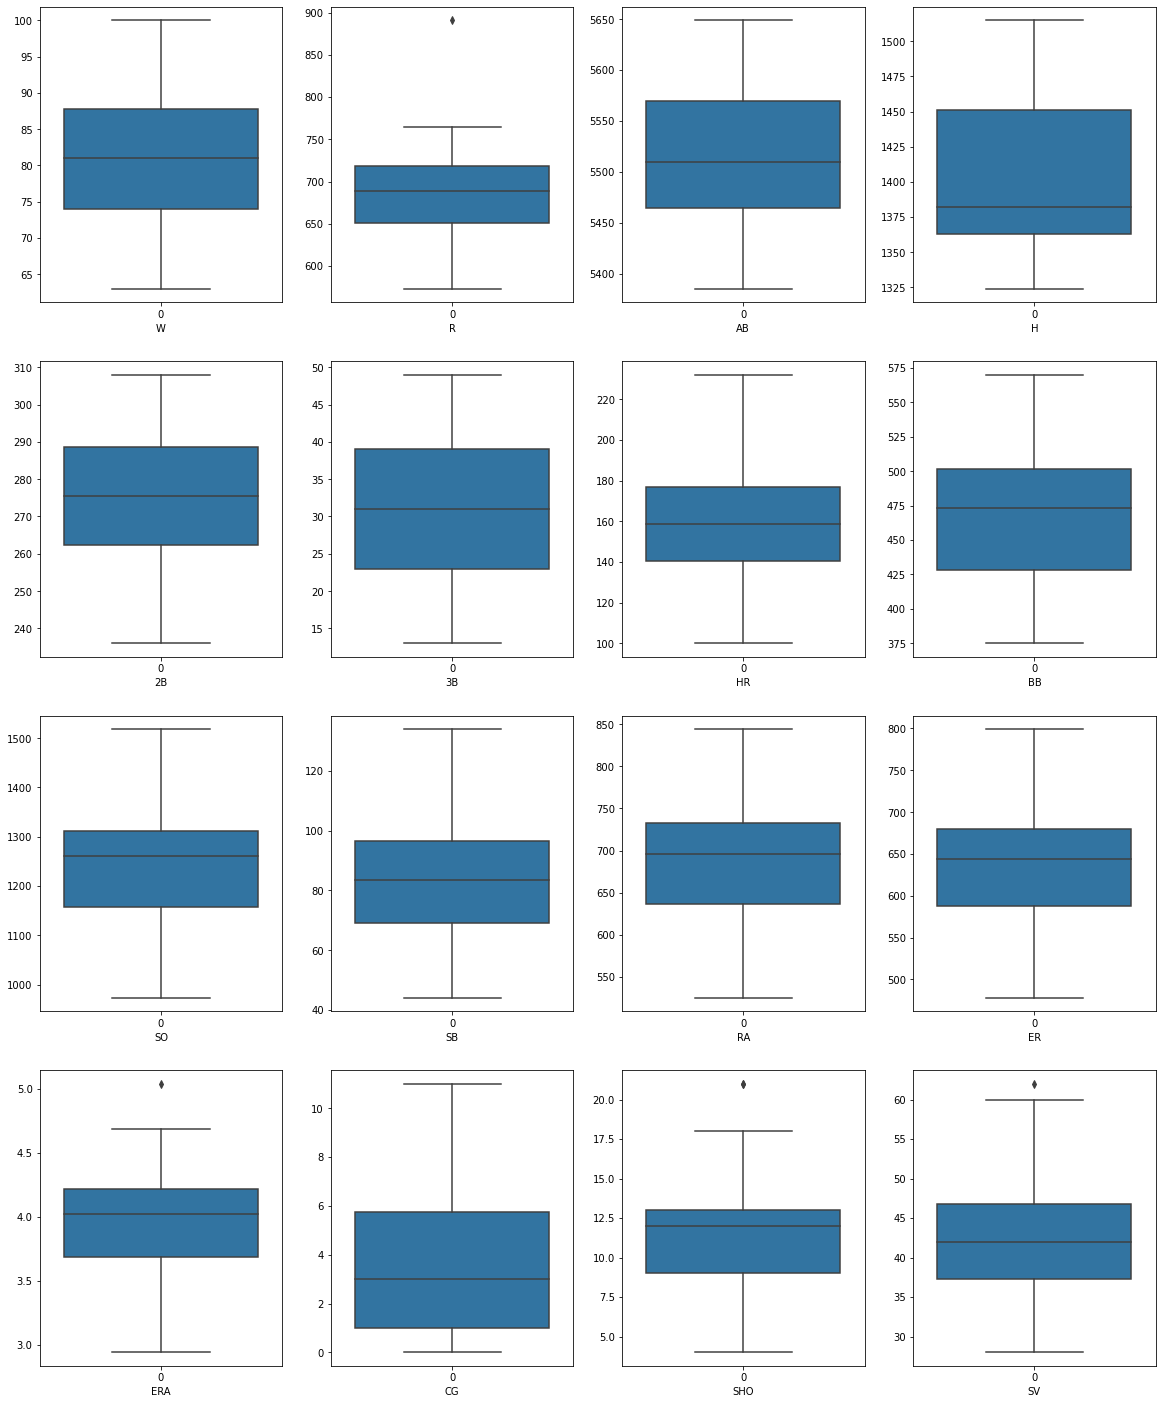

In [20]:
graph=1

plt.figure(figsize=(20,25))

for column in df:
    if graph<=16:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
    graph+=1
plt.show()

We can observe that columns('R','ERA','SHO','SV') are having outliers

# Data Preprocessing

## Removing Outliers using Z-technique

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [22]:
threshold=3  # rule of thumb
#index number
print(np.where(z>3))
len(np.where(z>3)[0])

(array([5], dtype=int64), array([1], dtype=int64))


1

In [23]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (30, 17)
new dataframe (29, 17)
total number of rows dropped 1


### Percentage data loss

In [24]:
loss_percent=(30-29)/30*100
loss_percent

3.3333333333333335

Since percentage loss is less than 10% .So it is safe to proceed futhur

### Separating label and features as x and y

In [25]:
x=df_new.drop(columns=['W','RA','ER','H','CG','AB'],axis=1)
y=df_new['W']

## Removing skewness using Datatransfromation

In [26]:
from sklearn.preprocessing import power_transform


In [27]:
x_new=power_transform(x,method='yeo-johnson',)
x_new

array([[ 9.62543504e-01,  1.68518793e+00,  1.00615029e+00,
        -7.41927000e-01, -1.60519802e+00, -2.55061247e+00,
         9.36131648e-01, -5.09292146e-01, -7.87002186e-01,
         1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01,  1.38197902e-01,  1.18522654e+00,
        -1.09958425e-01, -4.62095966e-01,  9.36832915e-02,
        -5.16377335e-01,  2.41440214e-01,  2.36736538e-01,
         3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  1.90738550e+00, -2.28819392e-01,
        -6.64354121e-01,  1.23209786e+00, -9.35611465e-01,
         2.25038365e-01, -6.42097599e-01, -2.52844176e-01,
        -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00, -8.37664770e-01, -4.32227907e-01,
        -8.60039342e-01, -1.16272085e+00, -2.30682707e-01,
        -6.18421529e-01,  4.30132461e-02, -5.13554932e-01,
        -8.20688859e-01,  6.50818351e-01],
       [ 1.37737301e-01,  9.11434794e-01,  1.62263592e+00,
        -2.89646675e-01, -1.55685826e-01,  4.41433307e-02,
  

In [28]:
pd.DataFrame(x_new).skew().sort_values()

2    -0.075139
1    -0.052793
0    -0.024842
6    -0.009570
4    -0.008572
9    -0.000925
7    -0.000401
3     0.000448
8     0.000529
5     0.051530
10    0.065585
dtype: float64

In [29]:
x=pd.DataFrame(x_new,columns=x.columns)

In [30]:
x.head()

,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV,E
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.509292,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.241440,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.642098,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.043013,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.493491,0.236737,-1.149165,-0.540820


In [31]:
x.skew()

R     -0.024842
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
ERA   -0.000401
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

We can observe that skewness is removed from the dataset

# Data Standardisation

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV,E
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.509292,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.241440,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.642098,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.043013,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.493491,0.236737,-1.149165,-0.540820
5,1.964209,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.153276,-2.064039,0.677176,0.082858
6,0.698146,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.197363,-0.252844,0.052325,-1.588197
7,-0.852595,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.487168,0.236737,1.908137,0.237592
8,1.555951,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.769577,-0.252844,-0.365006,0.383386
9,1.631727,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.615685,-0.513555,0.312020,1.554265


# Check for multicollierinity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,3.584952,R
1,2.276937,2B
2,2.897118,3B
3,4.156882,HR
4,2.178159,BB
5,2.092439,SO
6,1.640592,SB
7,3.667645,ERA
8,2.646814,SHO
9,1.950140,SV


# Training our model

# Using Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
lr=LinearRegression()

### Finding the best random state

In [37]:
max_acc=0
max_rs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    accuracy=r2_score(y_test,pred_lr)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.24577813192776432 random state 0
max_accuracy 0.24577813192776432 max_random_state 0
Testing accuracy 0.935720193366311 random state 1
max_accuracy 0.935720193366311 max_random_state 1
Testing accuracy 0.0319764061832889 random state 2
Testing accuracy 0.8628608197754128 random state 3
Testing accuracy 0.8173552726632852 random state 4
Testing accuracy 0.6141972517669956 random state 5
Testing accuracy 0.8962781032745712 random state 6
Testing accuracy 0.5463541716004376 random state 7
Testing accuracy 0.7867955319997543 random state 8
Testing accuracy 0.5065315666944292 random state 9
Testing accuracy 0.1710170470445339 random state 10
Testing accuracy 0.11219294659286316 random state 11
Testing accuracy 0.5956039306800736 random state 12
Testing accuracy 0.903179901545141 random state 13
Testing accuracy 0.7767199067137794 random state 14
Testing accuracy 0.917947165584546 random state 15
Testing accuracy 0.33485589098341817 random state 16
Testing accuracy 0.77005

We are getting maximum testing accuracy at random state 1

### Train Test Split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)


LinearRegression()

In [41]:
pred_test_y=lr.predict(x_test)
print(r2_score(y_test,pred_test_y))

0.935720193366311


Testing accuracy is 93.57%

In [42]:
#Finding best cross val score
y_train_pred=lr.predict(x_train)
Train_accuracy=r2_score(y_train,y_train_pred)
Test_accuracy=r2_score(y_test,pred_test_y)


from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")

At cross fold 2 the cv score is -0.3041290026123036
At cross fold 3 the cv score is 0.2166741435800379
At cross fold 4 the cv score is 0.38159815015460385
At cross fold 5 the cv score is 0.3468077008799685
At cross fold 6 the cv score is 0.28327583370262294
At cross fold 7 the cv score is 0.20504519771220048
At cross fold 8 the cv score is 0.3091896946827276
At cross fold 9 the cv score is -4.810637310133234


# Cross Validation

In [43]:
lssscore_selected=cross_val_score(lr,x,y,cv=4).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.38159815015460385


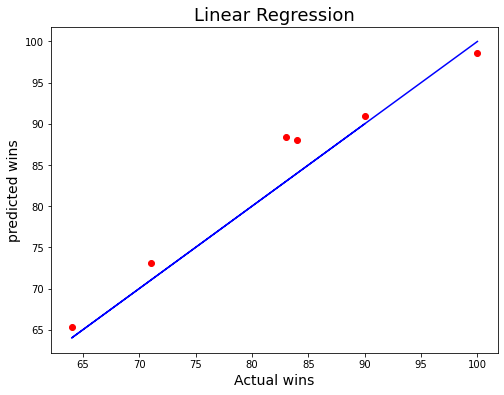

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual wins',fontsize=14)
plt.ylabel('predicted wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()


## Since the dataset is very small thats why our model is overfitting

In [45]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 2.532783197395865
MSE: 8.977746326505242
RMSE: 2.9962887588657474


## Hyperparameter Tuning


### Using Grid Search Cv(Ridge)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge


In [47]:
paramsRidge = {'alpha':[0.01,0.1,1.0,10.00],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],'random_state':[1,50],'max_iter':[100,500,1000,250]}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.0, 'max_iter': 100, 'random_state': 50, 'solver': 'sag'}


In [48]:
ridge=clf.best_estimator_

In [49]:
pred_test_y=ridge.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.8792790529063295


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
lssscore_selected=cross_val_score(ridge,x,y,cv=4).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.6803059021247735


In [52]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 3.0422624278180215
MSE: 16.86069227741598
RMSE: 4.106177331462437


### Using Grid Search Cv(Lasso)

In [53]:
parameters={'alpha':[0.0001,0.001,0.01,.1,1,10],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,500,1000]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'max_iter': 10, 'random_state': 0}


In [54]:
ls=clf.best_estimator_

In [55]:
pred_test_y=ls.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.9228393139682612


In [56]:
lssscore_selected=cross_val_score(ls,x,y,cv=4).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7705042053909434


In [57]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 2.497096125089733
MSE: 10.776775815766173
RMSE: 3.28279999630897


# Using Random Forest 

In [58]:
from sklearn.ensemble import RandomForestRegressor


In [59]:
rf=RandomForestRegressor()

rf.fit(x_train,y_train)


pred_test_y=rf.predict(x_test)
print(r2_score(y_test,pred_test_y))

0.7226769689737471


Testing Accuracy is 72.26%

### Hyperparameter Tuning

In [60]:
params={'n_estimators':[10,20],
       'max_depth':[10,20],
       'min_samples_split':[3,4,6,7,8]}


In [61]:
clf=GridSearchCV(rf,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 20}


In [62]:
rf=clf.best_estimator_

In [63]:
pred_test_y=rf.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.6741754052307076


In [64]:
lssscore_selected=cross_val_score(rf,x,y,cv=4).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.38913303865642446


# Using Adaptive Boosting (Ada Boost)

In [65]:
from sklearn.ensemble import AdaBoostRegressor

In [66]:
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)


pred_test_y=ada.predict(x_test)
print(r2_score(y_test,pred_test_y))

0.7439399690998212


Testing Accuracy is 74.03

### Hyperparameter Tuning


In [67]:
params={'n_estimators':[20,30,40,50,60,70],
       'learning_rate':[0.15,0.2,0.25,0.3,0.35,0.5,0.6],
       'random_state':[1,100]}


In [68]:
clf=GridSearchCV(ada,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.3, 'n_estimators': 60, 'random_state': 100}


In [69]:
ada=clf.best_estimator_

In [70]:
pred_test_y=ada.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))




Testing Accuracy 0.7591169451073985


In [71]:
lssscore_selected=cross_val_score(ada,x,y,cv=4).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.5778342045151621


# Using KNN

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn=KNeighborsRegressor()

knn.fit(x_train,y_train)


pred_test_y=knn.predict(x_test)
print(r2_score(y_test,pred_test_y))

0.6668735083532218


### Hyperparameter Tuning

In [74]:
params={'leaf_size':[2,3,4,5,6,7,8,9],
       'n_neighbors':[3,5,7,9],
       'algorithm':['kd_tree','brute','ball_tree']}



In [75]:
clf=GridSearchCV(knn,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 3}


In [76]:
knn=clf.best_estimator_

In [77]:
pred_test_y=knn.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.6295412357464863


In [78]:
lssscore_selected=cross_val_score(knn,x,y,cv=4).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.18278590810456502


# Conclusion

We can observe that

Linear Regression

   ----Ridge Regression-------  Testing Accuracy:87.92 and Cross val score:68.03
   ----Lasso Regression-------  Testing Accuracy:92.28 and Cross val score:77.05


Random Froest

     ------Testing Accuracy:67.41 and Cross val score:38.91--------

Ada Boosting

     ------Testing Accuracy:75.91 and Cross val score:57.78--------

KNN

    ------ Testing Accuracy:62.95 and Cross val score:18.27--------
 

### We can conclude that Lasso Regression is the best model as it has highest testing accuracy

# Saving the best model

In [79]:
import pickle

pickle.dump(ls,open('regmodel_baseball','wb'))